In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline


plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
x = tf.constant([137, 104, 100, 124.0, 19, 99, 124])
y = tf.constant([145, 110, 93, 116.0, 65, 104, 118])

meanX = tf.reduce_mean(x)
meanY = tf.reduce_mean(y)

sumXY = tf.reduce_sum((x - meanX) * (y - meanY))
sumX = tf.reduce_sum((x - meanX) * (x - meanX))

w = sumXY / sumX
b = meanY - w * meanX

In [3]:
print(w.numpy(), b.numpy())
print('y = ', w.numpy(), '* x +', b.numpy())

0.58304006 48.398666
y =  0.58304006 * x + 48.398666


In [4]:
x_test = np.array([128, 45, 141, 106, 99, 53.0])
y_pred = (w * x_test + b).numpy()

print('面积\t估计房价')

面积	估计房价


In [5]:
n = len(x_test)
for i in range(n):
    print(x_test[i], '\t', round(y_pred[i], 2))

128.0 	 123.03
45.0 	 74.64
141.0 	 130.61
106.0 	 110.2
99.0 	 106.12
53.0 	 79.3


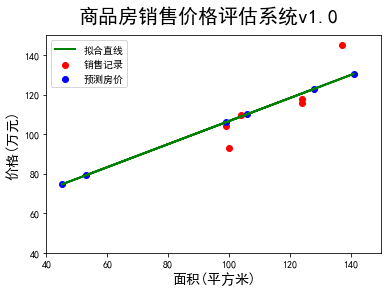

In [6]:
plt.figure()

plt.scatter(x, y, color='red', label='销售记录')
plt.scatter(x_test, y_pred, color='blue', label='预测房价')
plt.plot(x_test, y_pred, color='green', label='拟合直线', linewidth=2)

plt.xlabel('面积(平方米)', fontsize=14)
plt.ylabel('价格(万元)', fontsize=14)

plt.xlim((40, 150))
plt.ylim((40, 150))

plt.suptitle('商品房销售价格评估系统v1.0', fontsize=20)

plt.legend(loc='upper left')
plt.show()

In [7]:
x1 = np.array([137, 104, 100.0, 124, 79, 99])
x2 = np.array([3, 2, 2, 3, 1, 2])
y = np.array([145, 110, 93, 116, 65, 104.0])

# x1.shape, x2.shape, y.shape

x0 = np.ones(len(x1))
X = np.stack((x0, x1, x2), axis=1)

Y = np.array(y).reshape(-1, 1)

Xt = np.transpose(X)
XtX_1 = np.linalg.inv(np.matmul(Xt, X))
XtX_1_Xt = np.matmul(XtX_1, Xt)
W = np.matmul(XtX_1_Xt, Y)

W = W.reshape(-1)

print('多元回归方程:')
print('Y=', W[1], '*x1+', W[2], '*x2+', W[0])

多元回归方程:
Y= 1.6327037773359558 *x1+ -11.181411530815012 *x2+ -45.2450298210714


In [8]:
print('请输入面积和房间数:')

请输入面积和房间数:


In [9]:
x1_test = float(input('商品房面积:'))
x2_test = int(input('房间数:'))

y_pred = W[1] * x1_test + W[2] * x2_test + W[0]
print('预测价格:', round(y_pred, 2), '万元')

商品房面积:467
房间数:4
预测价格: 672.5 万元


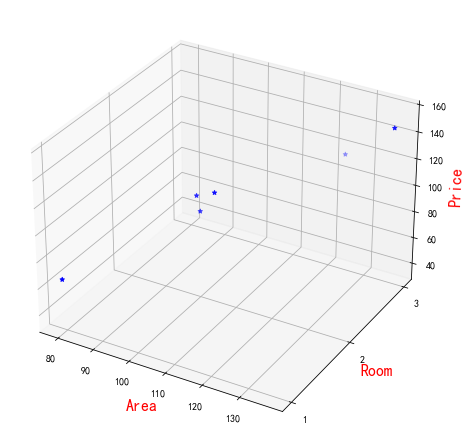

In [10]:
x1 = np.array([137, 104, 100.0, 124, 79, 99])
x2 = np.array([3, 2, 2, 3, 1, 2])
y = np.array([145, 110, 93, 116, 65, 104.0])

W = np.array([11.3653, 0.5653, 14.3895])
y_pred = W[1] * x1 + W[2] * x2 + W[0]

fig = plt.figure(figsize=(8, 6))
ax3d = Axes3D(fig)

ax3d.scatter(x1, x2, y, color='b', marker='*')

ax3d.set_xlabel('Area', color='r', fontsize=16)
ax3d.set_ylabel('Room', color='r', fontsize=16)
ax3d.set_zlabel('Price', color='r', fontsize=16)
ax3d.set_yticks([1, 2, 3])
ax3d.set_zlim3d(30, 160)

plt.show()

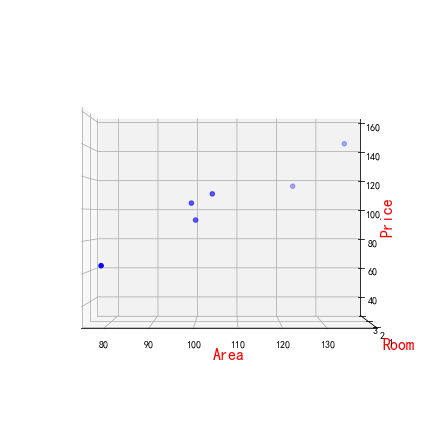

In [11]:
fig = plt.figure(figsize=(8, 6))
ax3d = Axes3D(fig)
ax3d.view_init(elev=0, azim=-90)

ax3d.scatter(x1, x2, y, color='b')

ax3d.set_xlabel('Area', color='r', fontsize=16)
ax3d.set_ylabel('Room', color='r', fontsize=16)
ax3d.set_zlabel('Price', color='r', fontsize=16)
ax3d.set_yticks([1, 2, 3])
ax3d.set_zlim3d(30, 160)

plt.show()

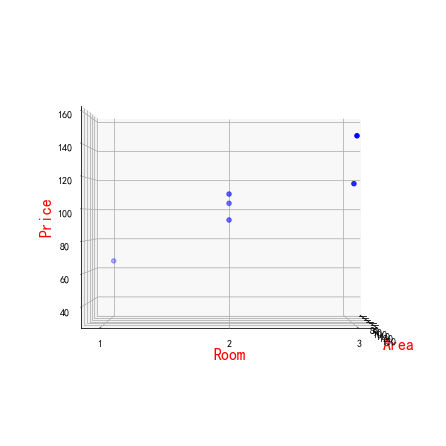

In [12]:
fig = plt.figure(figsize=(8, 6))
ax3d = Axes3D(fig)
ax3d.view_init(elev=0, azim=0)

ax3d.scatter(x1, x2, y, color='b')

ax3d.set_xlabel('Area', color='r', fontsize=16)
ax3d.set_ylabel('Room', color='r', fontsize=16)
ax3d.set_zlabel('Price', color='r', fontsize=16)
ax3d.set_yticks([1, 2, 3])
ax3d.set_zlim3d(30, 160)

plt.show()

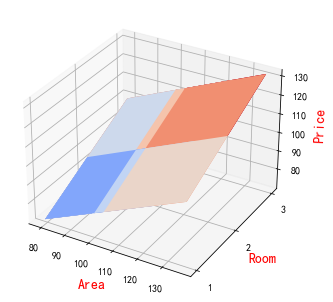

In [13]:
X1, X2 = np.meshgrid(x1, x2)
Y_PRED = W[0] + W[1] * X1 + W[2] * X2

fig = plt.figure()
ax3d = Axes3D(fig)

ax3d.plot_surface(X1, X2, Y_PRED, cmap='coolwarm')

ax3d.set_xlabel('Area', color='r', fontsize=14)
ax3d.set_ylabel('Room', color='r', fontsize=14)
ax3d.set_zlabel('Price', color='r', fontsize=14)
ax3d.set_yticks([1, 2, 3])

plt.show()

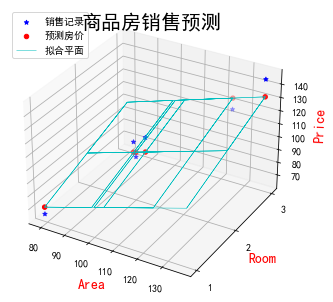

In [14]:
plt.rcParams['font.sans-serif'] = ['SimHei']

fig = plt.figure()
ax3d = Axes3D(fig)

ax3d.scatter(x1, x2, y, color='b', marker='*', label='销售记录')
ax3d.scatter(x1, x2, y_pred, color='r', label='预测房价')
ax3d.plot_wireframe(X1, X2, Y_PRED, color='c', linewidth=0.5, label='拟合平面')

ax3d.set_xlabel('Area', color='r', fontsize=14)
ax3d.set_ylabel('Room', color='r', fontsize=14)
ax3d.set_zlabel('Price', color='r', fontsize=14)
ax3d.set_yticks([1, 2, 3])

plt.suptitle('商品房销售预测', fontsize=20)
plt.legend(loc='upper left')
plt.show()